In [37]:
from typing import TypedDict
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from dotenv import load_dotenv


In [38]:
load_dotenv()

True

In [39]:
class LLMstate(TypedDict):
    topic:str
    outline:str
    essay:str
    score:float


In [40]:
model=ChatOpenAI()

In [41]:
graph=StateGraph(LLMstate)

In [42]:
def outline_node(state:LLMstate)->LLMstate:
    topic=state['topic']
    prompt=f'Give me the outline for this topic = {topic} which I will use to create an essay in future'
    outline=model.invoke(prompt).content
    state['outline']=outline
    return state


In [43]:
def essay_node(state:LLMstate)->LLMstate:
    topic=state['topic']
    outline=state['outline']
    prompt=f'Write an essay of 100 words on this topic = {topic} with the given outline below {outline}'
    essay=model.invoke(prompt).content
    state['essay']=essay
    return state


In [44]:
def evaluate_node(state:LLMstate)->LLMstate:
    outline=state['outline']
    essay=state['essay']
    prompt= f'based on the outline={outline} evaluate the below essay {essay} and just give a number answer in the format of number between 1- 100'
    score=float(model.invoke(prompt).content)
    state['score']=score
    return state



In [45]:
graph.add_node('outline_node',outline_node)
graph.add_node('essay_node',essay_node)
graph.add_node('evaluate_node',evaluate_node)

graph.add_edge(START,'outline_node')
graph.add_edge('outline_node','essay_node')
graph.add_edge('essay_node', 'evaluate_node')
graph.add_edge('evaluate_node', END)

workflow=graph.compile()




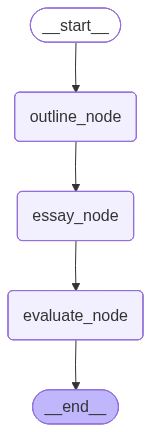

In [46]:
graph.compile()

In [51]:
initial_state={'topic':'India vs pakistan'}
final_state=workflow.invoke(initial_state)
print('*'*30)
print("Topic_Name:", final_state['topic'])
# print('*'*30)
# print(final_state['outline'])
print('*'*30)
print("score: ", final_state['score'])

******************************
Topic_Name: India vs pakistan
******************************
score:  85.0
